## Arriaga Mejía Deni Concepción
## Practica 1
## Base para encontrar si la publicación de un trabajo es real o fraude


In [1]:
conda install -c conda-forge/label/gcc7 missingno

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import missingno as msno
%matplotlib inline

In [3]:
path = 'fake_job_postings.csv'
df = pd.read_csv(path, encoding='latin', error_bad_lines=False)
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI â Environmental Systems Re...,"EDUCATION:Â Bachelorâs or Masterâs in GIS,...",Our culture is anything but corporateâwe hav...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
job_id                 17880 non-null int64
title                  17880 non-null object
location               17534 non-null object
department             6333 non-null object
salary_range           2868 non-null object
company_profile        14572 non-null object
description            17879 non-null object
requirements           15185 non-null object
benefits               10670 non-null object
telecommuting          17880 non-null int64
has_company_logo       17880 non-null int64
has_questions          17880 non-null int64
employment_type        14409 non-null object
required_experience    10830 non-null object
required_education     9775 non-null object
industry               12977 non-null object
function               11425 non-null object
fraudulent             17880 non-null int64
dtypes: int64(5), object(13)
memory usage: 2.5+ MB


In [6]:
df.shape

(17880, 18)

In [7]:
df.shape[0]

17880

In [8]:
df.shape[1]

18

In [9]:
df.columns.values.tolist()

['job_id',
 'title',
 'location',
 'department',
 'salary_range',
 'company_profile',
 'description',
 'requirements',
 'benefits',
 'telecommuting',
 'has_company_logo',
 'has_questions',
 'employment_type',
 'required_experience',
 'required_education',
 'industry',
 'function',
 'fraudulent']

In [10]:
df.dtypes

job_id                  int64
title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object

In [11]:
df.isnull().any().any()

True

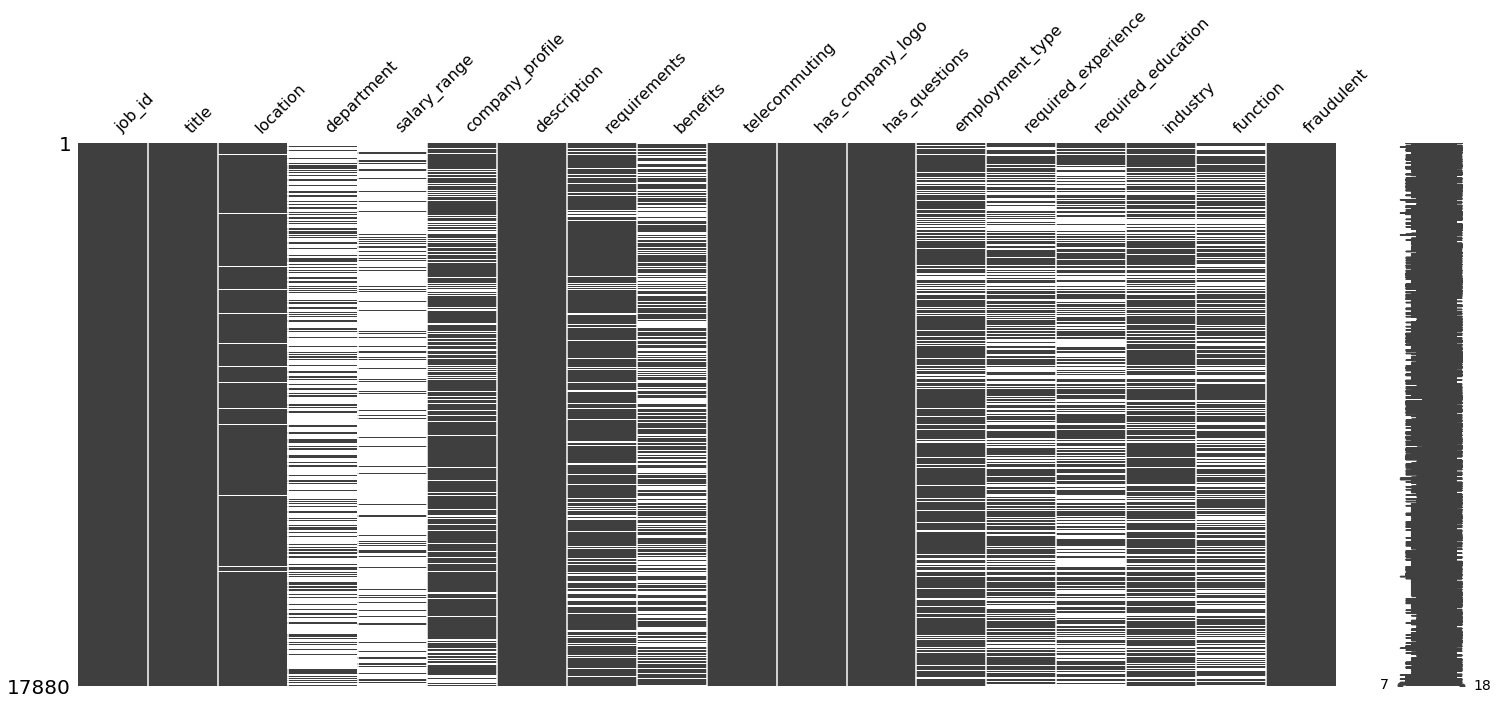

In [12]:
msno.matrix(df)
#aquí vimos de forma manual que si habian datos nulos que no los toma porque seguramente tienen espacios por eso no los toma en cuenta

In [13]:
df.replace({' ': np.nan}, inplace=True)

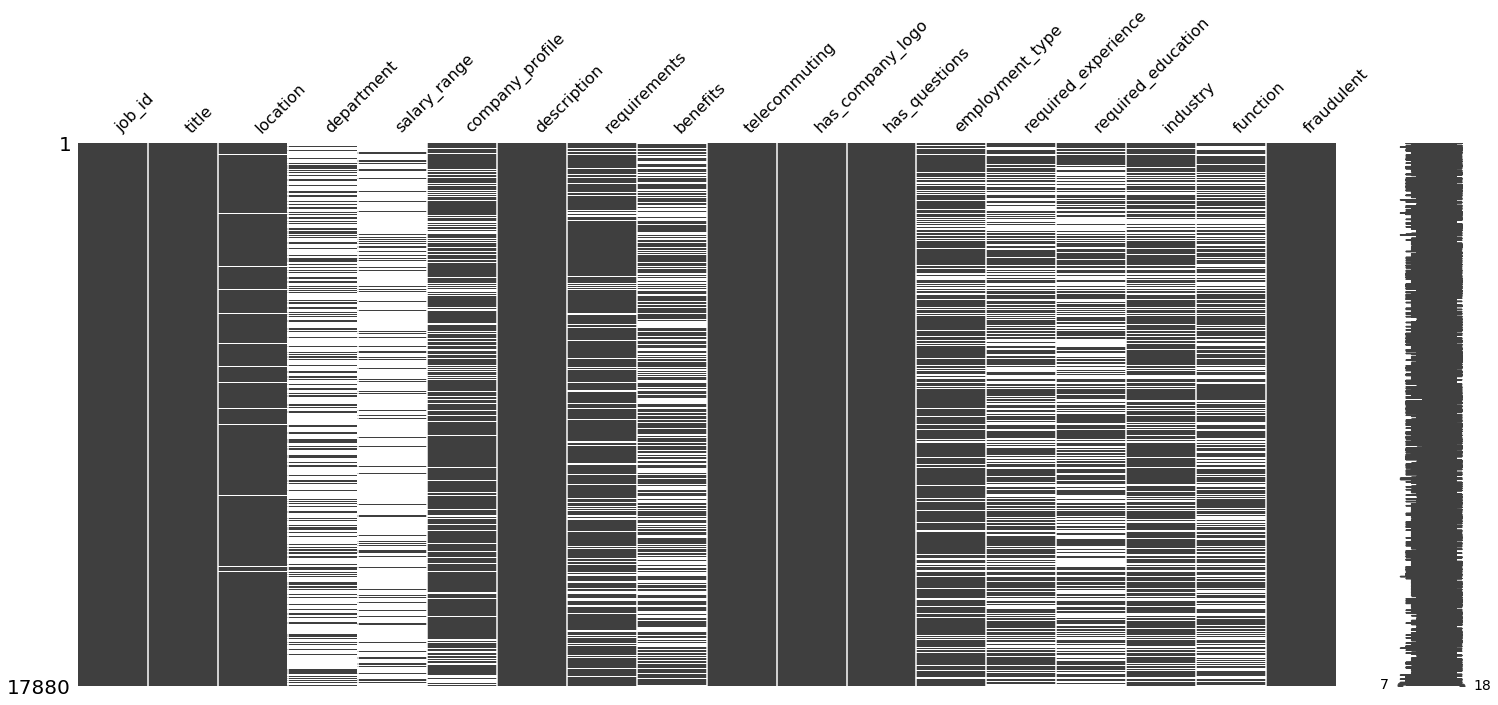

In [14]:
msno.matrix(df)

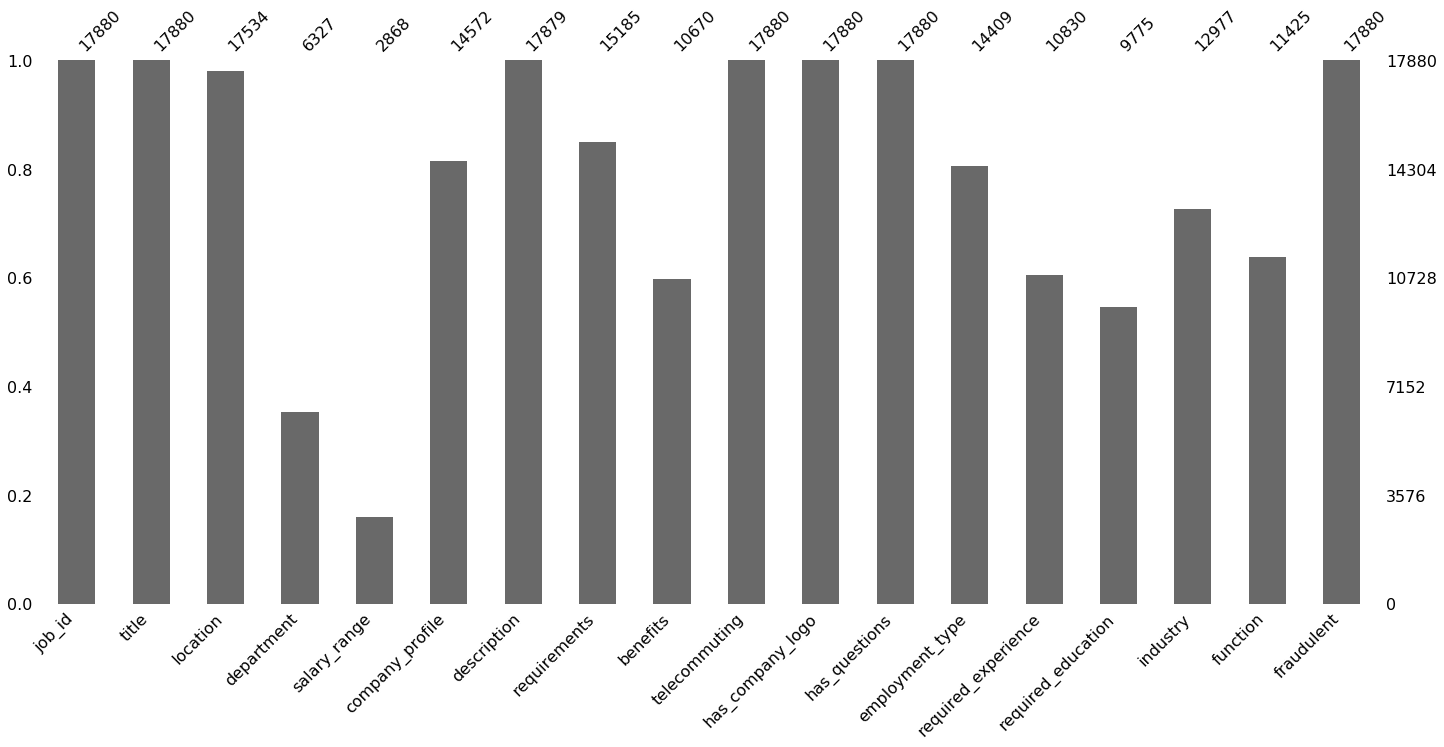

In [15]:
msno.bar(df)

In [16]:
df.columns[df.isnull().any()].tolist()

['location',
 'department',
 'salary_range',
 'company_profile',
 'description',
 'requirements',
 'benefits',
 'employment_type',
 'required_experience',
 'required_education',
 'industry',
 'function']

In [17]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
df.loc[[0]]

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0


In [19]:
df.loc[30:33]

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
30,31,Customer Service Technical Specialist,"US, MA, Waltham",NaN,NaN,"Novitex Enterprise Solutions, formerly Pitney ...",TheÂ Customer Service Technical Specialist wil...,Qualifications:Minimum ofÂ 6 monthsÂ customer ...,NaN,0,1,0,Full-time,Entry level,High School or equivalent,Computer Software,Customer Service,0
31,32,Software Applications Specialist,"US, KS,",NaN,50000-65000,NaN,"Day to Day-Install, upgrade and configure web-...",Must Have's3+ years of experience with web-bas...,"Medical, Dental, Vision, Life, Disability, Pre...",0,1,0,Full-time,Associate,Unspecified,Computer Software,Engineering,0
32,33,Craftsman Associate,"US, WA, Everett",Field,NaN,"We are an award-winning team of professionals,...",Construction: Entry-Level Craftsman Associate ...,Requirements:Â (Please do not apply if you do...,Benefits: Â Hourly plus commissions. Work with...,0,1,1,Full-time,Entry level,Unspecified,Construction,Other,0
33,34,Completion Engineer,"US, CA, San Ramon",NaN,NaN,Valor Services provides Workforce Solutions th...,About the CompanyThis is anÂ amazing job oppor...,Education:Bachelor of Science in Petroleum Eng...,NaN,0,1,1,Full-time,NaN,Bachelor's Degree,Oil & Energy,Engineering,0


In [20]:
df.drop([0,24,51], axis=0).head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI â Environmental Systems Re...,"EDUCATION:Â Bachelorâs or Masterâs in GIS,...",Our culture is anything but corporateâwe hav...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
5,6,Accounting Clerk,"US, MD,",NaN,NaN,NaN,Job OverviewApex is an environmental consultin...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,0


In [21]:
df.drop(df.index[1:5], axis=0).head(10)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
5,6,Accounting Clerk,"US, MD,",NaN,NaN,NaN,Job OverviewApex is an environmental consultin...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,0
6,7,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,20000-28000,"Founded in 2009, theÂ Fonpit AGÂ rose with its...",Your Responsibilities:Â Manage the English-spe...,Your Know-How:Â Â Â Â Â Â Â Â Â Â Â Â Â Â Â Â ...,Your Benefits:Â Being part of a fast-growing c...,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0
7,8,Lead Guest Service Specialist,"US, CA, San Francisco",NaN,NaN,Airenvyâs mission is to provide lucrative ye...,Who is Airenvy?Hey there! We are seasoned entr...,"Experience with CRM software, live chat, and p...",Competitive Pay.Â You'll be able to eat steak ...,0,1,1,NaN,NaN,NaN,NaN,NaN,0
8,9,HP BSM SME,"US, FL, Pensacola",NaN,NaN,Solutions3 is a woman-owned small business who...,Implementation/Configuration/Testing/Training ...,MUST BE A US CITIZEN.An active TS/SCI clearanc...,NaN,0,1,1,Full-time,Associate,NaN,Information Technology and Services,NaN,0
9,10,Customer Service Associate - Part Time,"US, AZ, Phoenix",NaN,NaN,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,Minimum Requirements:Minimum of 6 months custo...,NaN,0,1,0,Part-time,Entry level,High School or equivalent,Financial Services,Customer Service,0
10,11,ASP.net Developer Job opportunity at United St...,"US, NJ, Jersey City",NaN,100000-120000,NaN,Position : #URL_86fd830a95a64e2b30ceed829e63fd...,Position : #URL_86fd830a95a64e2b30ceed829e63fd...,Benefits - FullBonus Eligible - YesInterview T...,0,0,0,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,0
11,12,Talent Sourcer (6 months fixed-term contract),"GB, LND, London",HR,NaN,Want to build a 21st century financial service...,TransferWise is the clever new way to move mon...,Weâre looking for someone who:Proven track r...,You will join one of Europeâs most hotly tip...,0,1,0,NaN,NaN,NaN,NaN,NaN,0
12,13,"Applications Developer, Digital","US, CT, Stamford",NaN,NaN,"Novitex Enterprise Solutions, formerly Pitney ...","The Applications Developer, Digital will devel...",Requirements:4 â 5 yearsâ experience in de...,NaN,0,1,0,Full-time,Associate,Bachelor's Degree,Management Consulting,Information Technology,0
13,14,Installers,"US, FL, Orlando",NaN,NaN,Growing event production company providing sta...,"Event Industry Installers Needed!! (Orlando, F...","Valid driver's license,Somewhat Clean driving ...",NaN,0,1,1,Full-time,Not Applicable,Unspecified,Events Services,Other,0


In [22]:
df[100:].head() #df.tail(-100) )


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
100,101,CAD Operator,"US, NC, Raleigh",NaN,NaN,NaN,CAD Operator â Transmission Engineering. Und...,Two yearsâ experience with Microstation and/...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
101,102,English Teacher Abroad,"CA, MB, Winnipeg",NaN,NaN,We help teachers get safe &amp; secure jobs ab...,"Play with kids, get paid for itÂ Love travel? ...",University degree required.Â TEFL / TESOL / CE...,See job description,0,1,1,Contract,NaN,Bachelor's Degree,Education Management,NaN,0
102,103,Marketing Administrator,"GB, WAR, Coventry",Marketplace,15000-18000,Renewable Energy and Environmental Protection ...,The job is to support the growth of the #URL_9...,"Computer literateAble to work with HTML, altho...",For a suitably motivated and success orientate...,1,1,0,Full-time,Entry level,Bachelor's Degree,Internet,Marketing,0
103,104,Customer Service Associate - Part Time,"US, NY, New York",NaN,NaN,"Novitex Enterprise Solutions, formerly Pitney ...",Â The Customer Service Associate will be based...,Minimum Requirements:Minimum of 6 months custo...,NaN,0,1,0,Full-time,Entry level,High School or equivalent,Financial Services,Customer Service,0
104,105,Shipping Clerk,"US, PA, Reading",NaN,NaN,NaN,A Local company in Reading PA is looking for a...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,0


In [23]:
df.industry.values


array([nan, 'Marketing and Advertising', nan, ..., nan, 'Graphic Design',
       'Computer Software'], dtype=object)

In [24]:
df['industry'].values

array([nan, 'Marketing and Advertising', nan, ..., nan, 'Graphic Design',
       'Computer Software'], dtype=object)

In [25]:
df.industry.unique()


array([nan, 'Marketing and Advertising', 'Computer Software',
       'Hospital & Health Care', 'Online Media',
       'Information Technology and Services', 'Financial Services',
       'Management Consulting', 'Events Services', 'Internet',
       'Facilities Services', 'Consumer Electronics',
       'Telecommunications', 'Consumer Services', 'Construction',
       'Oil & Energy', 'Education Management', 'Building Materials',
       'Banking', 'Food & Beverages', 'Food Production',
       'Health, Wellness and Fitness', 'Insurance', 'E-Learning',
       'Cosmetics', 'Staffing and Recruiting',
       'Venture Capital & Private Equity', 'Leisure, Travel & Tourism',
       'Human Resources', 'Pharmaceuticals', 'Farming', 'Legal Services',
       'Luxury Goods & Jewelry', 'Machinery', 'Real Estate',
       'Mechanical or Industrial Engineering',
       'Public Relations and Communications', 'Consumer Goods',
       'Medical Practice', 'Electrical/Electronic Manufacturing',
       'Hospita

In [26]:
df.industry.value_counts()


Information Technology and Services    1734
Computer Software                      1376
Internet                               1062
Marketing and Advertising               828
Education Management                    822
                                       ... 
Shipbuilding                              1
Museums and Institutions                  1
Alternative Dispute Resolution            1
Wine and Spirits                          1
Sporting Goods                            1
Name: industry, Length: 131, dtype: int64

In [27]:
df.agg(['count', 'size', 'nunique'])


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
count,17880,17880,17534,6327,2868,14572,17879,15185,10670,17880,17880,17880,14409,10830,9775,12977,11425,17880
size,17880,17880,17880,17880,17880,17880,17880,17880,17880,17880,17880,17880,17880,17880,17880,17880,17880,17880
nunique,17880,11231,3105,1336,874,1709,14801,11968,6205,2,2,2,5,7,13,131,37,2


In [28]:
df.groupby('fraudulent').agg(['count', 'size', 'nunique']).stack()


job_id  title  location  department  salary_range  \
fraudulent                                                              
0          count     17014  17014     16687        5992          2645   
           size      17014  17014     17014       17014         17014   
           nunique   17014  10730      2913        1268           828   
1          count       866    866       847         335           223   
           size        866    866       866         866           866   
           nunique     866    560       373         103           117   

                    company_profile  description  requirements  benefits  \
fraudulent                                                                 
0          count              14293        17014         14473     10168   
           size               17014        17014         17014     17014   
           nunique             1660        14171         11494      5904   
1          count                279          865           712       502   
           size                 866          866           866       866   
           nunique               49          631           478       307   

                    telecommuting  has_company_logo  has_questions  \
fraudulent                                                           
0          count            17014             17014          17014   
           size             17014             17014          17014   
           nunique              2                 2              2   
1          count              866               866            866   
           size               866               866            866   
           nunique              2                 2              2   

                    employment_type  required_experience  required_education  \
fraudulent                                                                     
0          count              13784                10399                9360   
           size               17014                17014               17014   
           nunique                5                    7                  13   
1          count                625                  431                 415   
           size                 866                  866                 866   
           nunique                5                    7                  10   

                    industry  function  
fraudulent                              
0          count       12386     10896  
           size        17014     17014  
           nunique       130        37  
1          count         591       529  
           size          866       866  
           nunique        62        27

In [29]:
df.groupby('fraudulent').agg(['count', 'size', 'nunique'])

job_id                 title                location         \
            count   size nunique  count   size nunique    count   size   
fraudulent                                                               
0           17014  17014   17014  17014  17014   10730    16687  17014   
1             866    866     866    866    866     560      847    866   

                   department  ... required_experience required_education  \
           nunique      count  ...             nunique              count   
fraudulent                     ...                                          
0             2913       5992  ...                   7               9360   
1              373        335  ...                   7                415   

                          industry                function                 
             size nunique    count   size nunique    count   size nunique  
fraudulent                                                                 
0           17014      13    12386  17014     130    10896  17014      37  
1             866      10      591    866      62      529    866      27  

[2 rows x 51 columns]

In [30]:
df_sample = df.sample(frac=0.05, random_state=1)
df_sample.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
5736,5737,Jr. Business Analyst & Quality Analyst (entry...,"US, NJ, PISCATAWAY",NaN,NaN,NaN,"Duration: Full time / W2Location: Piscataway,N...",What we require:-- Masters degree in Computers...,NaN,0,0,0,Full-time,Entry level,Master's Degree,Financial Services,Finance,0
7106,7107,English Teacher Abroad,"US, PA, Scranton",NaN,NaN,We help teachers get safe &amp; secure jobs ab...,"Play with kids, get paid for itÂ Love travel? ...",University degree required.Â TEFL / TESOL / CE...,See job description,0,1,1,Contract,NaN,Bachelor's Degree,Education Management,NaN,0
11978,11979,SQL Server Database Developer Job opportunity ...,"US, IL, Barrington",NaN,90000-100000,We are an innovative personnel-sourcing firm w...,Position : SQL Server Database DeveloperJob Lo...,Position : SQL Server Database DeveloperJob Lo...,Benefits - FullBonus Eligible - Yes,0,0,0,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,0
9374,9375,Legal Analyst - 12 Month FTC,"GB, LND, London",Legal,NaN,MarketInvoice is one of the most high-profile ...,DescriptionOur mission at MarketInvoice is to ...,Duties and ResponsibilitiesReviewing contractu...,Competitive salaryPrivate HealthcareHalf price...,0,1,0,Full-time,Associate,Professional,Financial Services,Legal,0
1300,1301,Part-Time Finance Assistant,"GB, LND,",NaN,NaN,NaN,Salary:Â£9 - Â£10 per hourÂ We are currently g...,"Your role will be a varied, interesting and in...",Salary:Â£9 - Â£10 per hourÂ,0,0,0,Part-time,NaN,NaN,Accounting,NaN,0


In [31]:
df.shape


(17880, 18)

In [32]:
df_sample.shape


(894, 18)

In [33]:
##Data Transform##
#Drop Rows with missing count

In [34]:
df_dropped = df.dropna(subset=['description'])
df_dropped.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI â Environmental Systems Re...,"EDUCATION:Â Bachelorâs or Masterâs in GIS,...",Our culture is anything but corporateâwe hav...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [35]:
df_dropped.shape


(17879, 18)

In [38]:
df_copy = df.copy()
df_copy.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI â Environmental Systems Re...,"EDUCATION:Â Bachelorâs or Masterâs in GIS,...",Our culture is anything but corporateâwe hav...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [39]:
df_copy.shape


(17880, 18)

In [40]:
#Fill Missing count values with mean count

#ffill() and bfill() functions copy forward the data from the previous row (forward fill) or copy the value from the next row (backward fill)

In [44]:
df_dropped['fraudulent'].dtype

dtype('int64')

In [45]:
df_dropped['fraudulent'].mean()

0.04838078192292634

In [46]:
df_copy['fraudulent'].fillna(value=np.round(df['fraudulent'].mean(),decimals=0), inplace=True)

In [47]:
df_copy.agg(['count', 'size', 'nunique'])


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
count,17880,17880,17534,6327,2868,14572,17879,15185,10670,17880,17880,17880,14409,10830,9775,12977,11425,17880
size,17880,17880,17880,17880,17880,17880,17880,17880,17880,17880,17880,17880,17880,17880,17880,17880,17880,17880
nunique,17880,11231,3105,1336,874,1709,14801,11968,6205,2,2,2,5,7,13,131,37,2
